In [68]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Data Processing

In [69]:
data = pd.read_csv('./train.csv', usecols=["Year", "Country", "Total Deaths", "Total Affected", "Reconstruction Costs", "Total Damages"])

## modify location
loc_dict = {}
ind = 0
for con in data["Country"]:
    if con not in loc_dict.keys():
        loc_dict[con] = ind
        ind +=1

data.replace({"Country": loc_dict}, inplace= True)

## modifying time
# tim_dict = {}
# for tim in data["Local Time"]:
#     if tim not in tim_dict.keys() and not pd.isna(tim):
#         hrs, mins = map(int, tim.split(":"))
#         tim_dict[tim] = hrs*60 + mins

# data.replace({"Local Time": tim_dict}, inplace= True)
data["Total Affected"] = data["Total Affected"].div(1e4*3.16)
data.fillna(method='ffill', inplace= True)
data.fillna(value=0, inplace= True)
train_data, test_data, train_target, test_target = train_test_split(data.drop('Total Affected', axis=1), data['Total Affected'], test_size=0.2, random_state=42)

### ML models

In [70]:
regressor = LinearRegression()

regressor.fit(train_data, train_target)

predictions = regressor.predict(test_data)

mse = mean_squared_error(test_target, predictions)

print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 208411.53


In [71]:
regressor = GradientBoostingRegressor()

regressor.fit(train_data, train_target)

predictions = regressor.predict(test_data)

mse = mean_squared_error(test_target, predictions)

print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 152869.80


In [72]:
dt = DecisionTreeRegressor(max_depth=5)

# Train the model on the training data
dt.fit(train_data, train_target)

# Make predictions on the testing data
y_pred = dt.predict(test_data)

# Evaluate the performance of the model
mse = mean_squared_error(test_target, y_pred)
print("MSE: ", mse)


MSE:  166713.4930255926


In [73]:
rf = RandomForestRegressor(max_depth=5)

# Train the model on the training data
rf.fit(train_data, train_target)

# Make predictions on the testing data
y_pred = rf.predict(test_data)

# Evaluate the performance of the model
mse = mean_squared_error(test_target, y_pred)
print("MSE: ", mse)

MSE:  137923.80948213392


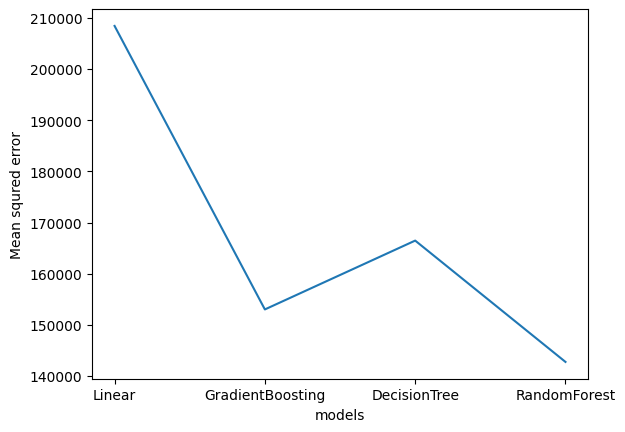

In [74]:
import matplotlib.pyplot as plt
x = ["Linear", "GradientBoosting", "DecisionTree", "RandomForest"]
y = [208411.53, 153025.38, 166473.42559563578, 142770.9307282924]
plt.xlabel("models")
plt.ylabel("Mean squred error")
plt.plot(x, y)
plt.savefig("x.png")